In [1]:
# Importing the standard Python packages
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Actor Specific Problem Formulations

In [2]:
# Loading in the necessary modules for EMA workbench and functions
from __future__ import (unicode_literals, print_function, absolute_import,
                        division)

from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport

from problem_formulation import sum_over

In [3]:
# Loading in the necessary modules for EMA workbench and functions
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation

# Loading in all the 17 objectives via predefined problem formulation 3
if __name__ == '__main__':
    ema_logging.log_to_stderr(ema_logging.INFO)

    dike_model = get_model_for_problem_formulation(3)

[MainProcess/INFO] model initialized


In [4]:
# Replicate the uncertainties
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])
CategoricalParameter('discount rate', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)


In [5]:
# Replicate the levers
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

IntegerParameter('A.1_DikeIncrease', 0, 10)
IntegerParameter('A.2_DikeIncrease', 0, 10)
IntegerParameter('A.3_DikeIncrease', 0, 10)
IntegerParameter('A.4_DikeIncrease', 0, 10)
IntegerParameter('A.5_DikeIncrease', 0, 10)
IntegerParameter('0_RfR', 0, 1)
IntegerParameter('1_RfR', 0, 1)
IntegerParameter('2_RfR', 0, 1)
IntegerParameter('3_RfR', 0, 1)
IntegerParameter('4_RfR', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)


In [6]:
# Replicate the objectives
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1_Expected Annual Damage')
ScalarOutcome('A.1_Dike Investment Costs')
ScalarOutcome('A.1_Expected Number of Deaths')
ScalarOutcome('A.2_Expected Annual Damage')
ScalarOutcome('A.2_Dike Investment Costs')
ScalarOutcome('A.2_Expected Number of Deaths')
ScalarOutcome('A.3_Expected Annual Damage')
ScalarOutcome('A.3_Dike Investment Costs')
ScalarOutcome('A.3_Expected Number of Deaths')
ScalarOutcome('A.4_Expected Annual Damage')
ScalarOutcome('A.4_Dike Investment Costs')
ScalarOutcome('A.4_Expected Number of Deaths')
ScalarOutcome('A.5_Expected Annual Damage')
ScalarOutcome('A.5_Dike Investment Costs')
ScalarOutcome('A.5_Expected Number of Deaths')
ScalarOutcome('RfR Total Costs')
ScalarOutcome('Expected Evacuation Costs')


In [7]:
# Import ScalarOutcome from ema_workbench to define the actor specific outcomes of interest in the next function
from ema_workbench import ScalarOutcome

In [8]:
# Writing a function to create actor specific problem formulations
def problem_formulation_actor(problem_formulation_actor):
   
    # Load the model:
    function = DikeNetwork()
    # workbench model:
    model = Model('dikesnet', function=function)
    # Outcomes are all costs, thus they have to minimized:
    direction = ScalarOutcome.MINIMIZE
    
    model.uncertainties = uncertainties
    model.levers = levers

    if problem_formulation_actor == 4: # RWS
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome('Expected Annual Damage',
                            variable_name=['{}_Expected Annual Damage'.format(dike)
                                                for dike in function.dikelist],
                            function=sum_over, kind=direction),

            ScalarOutcome('Total Investment Costs',
                            variable_name=['{}_Dike Investment Costs'.format(dike)
                                                for dike in function.dikelist] + ['RfR Total Costs'
                                                                                ] + ['Expected Evacuation Costs'],
                            function=sum_over, kind=direction),

            ScalarOutcome('Expected Number of Deaths',
                            variable_name=['{}_Expected Number of Deaths'.format(dike)
                                                for dike in function.dikelist],
                            function=sum_over, kind=direction)] 
    
    elif problem_formulation_actor == 5: # GELDERLAND
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome('Expected Annual Damage A1-4',
                            variable_name=['A.1_Expected Annual Damage' ,'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage'], function=sum_over, kind=direction),

            ScalarOutcome('Investment Costs A1-4',
                            variable_name=['A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs'], function=sum_over, kind=direction),

            ScalarOutcome('Expected Number of Deaths in A1-4',
                            variable_name=['A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths'], function=sum_over, kind=direction)]
    
    elif problem_formulation_actor == 6: # OVERIJSSEL
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome('Expected Annual Damage A5', variable_name=['A.5_Expected Annual Damage'], kind=direction),

            ScalarOutcome('Investment Costs A5', variable_name=['A.5_Dike Investment Costs'], kind=direction),

            ScalarOutcome('Expected Number of Deaths in A5', variable_name=['A.5_Expected Number of Deaths'], kind=direction)]
    
    else:
        raise TypeError('unknown identifier')
    return model

In [9]:
# Loading in the right problem formulation, in this case for Gelderland
model = problem_formulation_actor(5)

[MainProcess/INFO] model initialized


In [10]:
# Check the levers
for outcome in model.levers:
    print(repr(outcome))

IntegerParameter('A.1_DikeIncrease', 0, 10)
IntegerParameter('A.2_DikeIncrease', 0, 10)
IntegerParameter('A.3_DikeIncrease', 0, 10)
IntegerParameter('A.4_DikeIncrease', 0, 10)
IntegerParameter('A.5_DikeIncrease', 0, 10)
IntegerParameter('0_RfR', 0, 1)
IntegerParameter('1_RfR', 0, 1)
IntegerParameter('2_RfR', 0, 1)
IntegerParameter('3_RfR', 0, 1)
IntegerParameter('4_RfR', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)


In [11]:
# Check the uncertainties
for outcome in model.uncertainties:
    print(repr(outcome))

RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])
CategoricalParameter('discount rate', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)


In [12]:
# Check is the right objectives are loaded in
for outcome in model.outcomes:
    print(repr(outcome))

ScalarOutcome('Expected Annual Damage A1-4', variable_name=['A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage'], function=<function sum_over at 0x0000023565DD6840>)
ScalarOutcome('Investment Costs A1-4', variable_name=['A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs'], function=<function sum_over at 0x0000023565DD6840>)
ScalarOutcome('Expected Number of Deaths in A1-4', variable_name=['A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths'], function=<function sum_over at 0x0000023565DD6840>)


# MORDM Best Case

In [13]:
# Best case specification
bestcase_values = {'Bmax': 175, 'Brate': 1.5, 'pfail': 0,
                        'discount rate': 4.5,
                        'ID flood wave shape': 4}


bestcase_scen = {}

for key in dike_model.uncertainties:
    name_split = key.name.split('_')
    if len(name_split) == 1:

        bestcase_scen.update({key.name: bestcase_values[key.name]})
    else:
        bestcase_scen.update({key.name: bestcase_values[name_split[1]]})
            
best_scenario = Scenario('reference', **bestcase_scen)

In [14]:
# Loading in the right packages for running the optimization
from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)

In [15]:
# Searching for candidate solutions, by variating the definitions of the levers for the best-case scenario
convergence_metrics = {EpsilonProgress()}

with MultiprocessingEvaluator(model) as evaluator:
    results, convergence = evaluator.optimize(nfe=10000, searchover='levers',
                                 convergence=convergence_metrics,
                                 epsilons=[0.05,]*len(model.outcomes), reference=best_scenario)

[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 100 policies * 1 model(s) = 100 experiments
[MainProcess/INFO] 33 cases completed
[MainProcess/INFO] 66 cases completed
[MainProcess/INFO] 99 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 1: 100/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 99 policies * 1 model(s) = 99 experiments
[MainProcess/INFO] 33 cases completed
[MainProcess/INFO] 66 cases completed
[MainProcess/INFO] 99 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 2: 199/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 99 policies * 1 model(s) = 99 experiments
[MainProcess/INFO] 33 cases completed
[MainProcess/INFO] 66 cases completed
[MainProcess/INFO] 99 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 3: 298/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 100 policies * 1

[MainProcess/INFO] 99 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 29: 2875/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 98 policies * 1 model(s) = 98 experiments
[MainProcess/INFO] 33 cases completed
[MainProcess/INFO] 66 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 30: 2973/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 98 policies * 1 model(s) = 98 experiments
[MainProcess/INFO] 33 cases completed
[MainProcess/INFO] 66 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 31: 3071/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 96 policies * 1 model(s) = 96 experiments
[MainProcess/INFO] 32 cases completed
[MainProcess/INFO] 64 cases completed
[MainProcess/INFO] 96 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 32: 3167/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 100 policies * 1 model(s) = 100 experi

[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 58: 5747/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 99 policies * 1 model(s) = 99 experiments
[MainProcess/INFO] 33 cases completed
[MainProcess/INFO] 66 cases completed
[MainProcess/INFO] 99 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 59: 5846/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 99 policies * 1 model(s) = 99 experiments
[MainProcess/INFO] 33 cases completed
[MainProcess/INFO] 66 cases completed
[MainProcess/INFO] 99 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 60: 5945/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 100 policies * 1 model(s) = 100 experiments
[MainProcess/INFO] 33 cases completed
[MainProcess/INFO] 66 cases completed
[MainProcess/INFO] 99 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 61: 6045/10000 nfe
[MainProcess/INFO] performing 1 scenarios 

[MainProcess/INFO] generation 87: 8618/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 97 policies * 1 model(s) = 97 experiments
[MainProcess/INFO] 32 cases completed
[MainProcess/INFO] 64 cases completed
[MainProcess/INFO] 96 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 88: 8715/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 99 policies * 1 model(s) = 99 experiments
[MainProcess/INFO] 33 cases completed
[MainProcess/INFO] 66 cases completed
[MainProcess/INFO] 99 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 89: 8814/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 100 policies * 1 model(s) = 100 experiments
[MainProcess/INFO] 33 cases completed
[MainProcess/INFO] 66 cases completed
[MainProcess/INFO] 99 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 90: 8914/10000 nfe
[MainProcess/INFO] performing 1 scenarios * 99 policies * 1 model(s) = 99 experime

In [16]:
# Specifying the results for the best case scenario
best_results = results
best_convergence = convergence

C:\Users\LocalAdmin\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\LocalAdmin\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


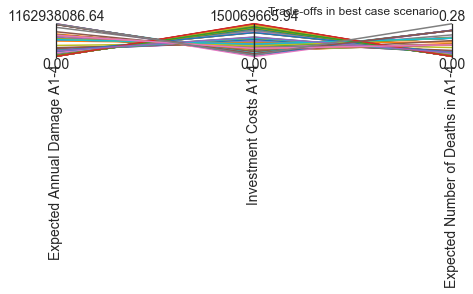

In [17]:
# Plot the trade-offs between the outcomes of interest
from ema_workbench.analysis import parcoords

best_data = best_results.loc[:, [o.name for o in model.outcomes]]
best_limits = parcoords.get_limits(best_data)
best_limits.loc[0, ['Expected Annual Damage A1-4', 'Investment Costs A1-4', 'Expected Number of Deaths in A1-4']] = 0

paraxes = parcoords.ParallelAxes(best_limits)
paraxes.plot(best_data)
plt.title('Trade-offs in best case scenario')

# Set figure size
# Run this twice, to get a nice broad view
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.show()

# When only 1 solution is proposed, this will result in a flat line

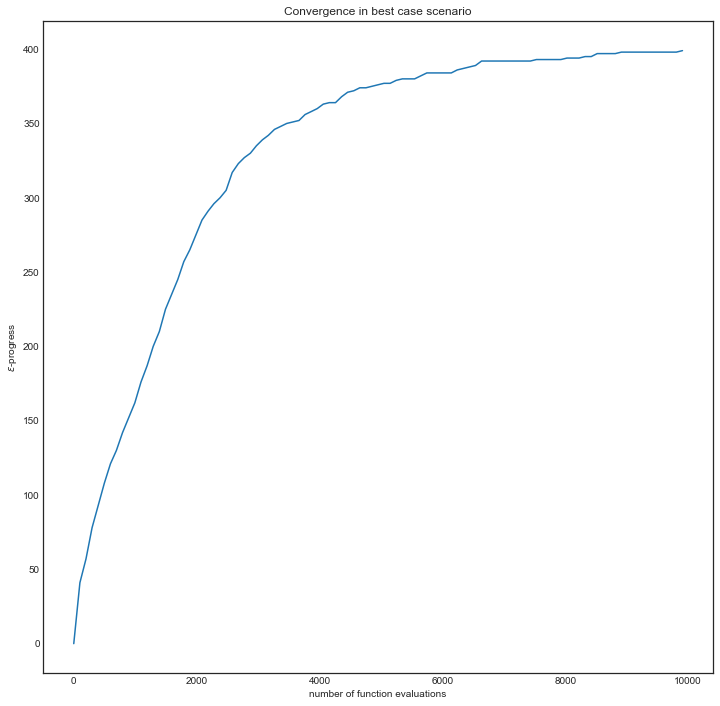

In [18]:
# By plotting whether the results are converged nicely, it can be checked whether more nfe's are necessary to run
import matplotlib.pyplot as plt
plt.plot(best_convergence.nfe,best_convergence.epsilon_progress)
plt.ylabel('$\epsilon$-progress')
plt.xlabel('number of function evaluations')
plt.title('Convergence in best case scenario')
plt.show()

In [19]:
# Complete results dataframe
best_results

,A.1_DikeIncrease,A.2_DikeIncrease,A.3_DikeIncrease,A.4_DikeIncrease,A.5_DikeIncrease,0_RfR,1_RfR,2_RfR,3_RfR,4_RfR,EWS_DaysToThreat,Expected Annual Damage A1-4,Investment Costs A1-4,Expected Number of Deaths in A1-4
0,4,6,9,0,9,1,1,1,1,1,3,4.525943e+07,1.258291e+08,0.004844
1,4,7,9,7,7,1,1,1,1,1,4,1.245638e+07,1.410645e+08,0.001877
2,4,0,9,0,7,1,1,1,1,1,3,2.275446e+08,7.184241e+07,0.033345
3,4,7,9,0,4,1,1,1,1,1,3,3.858405e+07,1.297919e+08,0.003691
4,4,0,6,0,8,1,1,1,1,1,3,2.407600e+08,6.749667e+07,0.037821
5,4,0,6,7,4,1,1,1,1,1,3,2.146323e+08,7.876926e+07,0.036008
6,4,0,8,0,9,1,1,1,1,1,4,2.308833e+08,7.032741e+07,0.034496
7,4,6,8,0,7,1,1,1,1,1,3,4.859816e+07,1.243141e+08,0.005994
8,0,0,6,7,7,1,1,1,1,1,3,7.497375e+08,3.693865e+07,0.100777
9,4,7,8,7,7,1,1,1,1,1,3,1.579511e+07,1.395495e+08,0.003028


In [20]:
# The outcomes of interest are dropped from the dataframe, obtaining a dataframe with only the solutions specified
bestcase_policies = best_results
bestcase_policies = bestcase_policies.drop([o.name for o in model.outcomes], axis=1)
bestcase_policies

,A.1_DikeIncrease,A.2_DikeIncrease,A.3_DikeIncrease,A.4_DikeIncrease,A.5_DikeIncrease,0_RfR,1_RfR,2_RfR,3_RfR,4_RfR,EWS_DaysToThreat
0,4,6,9,0,9,1,1,1,1,1,3
1,4,7,9,7,7,1,1,1,1,1,4
2,4,0,9,0,7,1,1,1,1,1,3
3,4,7,9,0,4,1,1,1,1,1,3
4,4,0,6,0,8,1,1,1,1,1,3
5,4,0,6,7,4,1,1,1,1,1,3
6,4,0,8,0,9,1,1,1,1,1,4
7,4,6,8,0,7,1,1,1,1,1,3
8,0,0,6,7,7,1,1,1,1,1,3
9,4,7,8,7,7,1,1,1,1,1,3


In [21]:
# Selecting the policies that are proposed as solutions for further robustness tests
from ema_workbench import Policy

bestcase_policies_to_evaluate = []

for i, policy in bestcase_policies.iterrows():
    bestcase_policies_to_evaluate.append(Policy(str(i), **policy.to_dict()))

In [22]:
# Testing the robustness of the proposed solutions for 1000 random scenarios
n_scenarios = 1000
with MultiprocessingEvaluator(model) as evaluator:
    best_results = evaluator.perform_experiments(n_scenarios,
                                            bestcase_policies_to_evaluate)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 108 policies * 1 model(s) = 108000 experiments
[MainProcess/INFO] 10800 cases completed
[MainProcess/INFO] 21600 cases completed
[MainProcess/INFO] 32400 cases completed
[MainProcess/INFO] 43200 cases completed
[MainProcess/INFO] 54000 cases completed
[MainProcess/INFO] 64800 cases completed
[MainProcess/INFO] 75600 cases completed
[MainProcess/INFO] 86400 cases completed
[MainProcess/INFO] 97200 cases completed
[MainProcess/INFO] 108000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [23]:
# Saving the results
from ema_workbench import save_results

save_results(best_results, 'MORDM_reevaluation_GELDERLAND_bestcase.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\LocalAdmin\Google Drive\EPAself\Model-Based Decision-Making\epa1361_open-master\final assignment\MORDM_reevaluation_GELDERLAND_bestcase.tar.gz


In [15]:
# Loading in the results again
from ema_workbench import load_results

results_reevaluation_gelderland_bestcase = load_results('MORDM_reevaluation_GELDERLAND_bestcase.tar.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\Anne Boijmans\Documents\EPA\EPA1361\UPDATE3\final assignment\MORDM_reevaluation_GELDERLAND_bestcase.tar.gz


In [16]:
# Defining a function to calculate the signal-to-noise ratio, a robustness metric
def s_to_n(best_data, direction):
    mean = np.mean(best_data)
    std = np.std(best_data)
    
    if direction==ScalarOutcome.MAXIMIZE:
        return mean/std
    else:
        return mean*std

In [17]:
# In this piece of code, the signal-to-noise ratios are calculated, by iterating over the policies and outcomes
# Finally, the results are stored in a dataframe
experiments, outcomes = results_reevaluation_gelderland_bestcase

overall_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}
    
    logical = experiments['policy']==policy
    
    for outcome in model.outcomes:
        value  = outcomes[outcome.name][logical]
        sn_ratio = s_to_n(value, outcome.kind)
        scores[outcome.name] = sn_ratio
    overall_scores[policy] = scores
scores = pd.DataFrame.from_dict(overall_scores).T
scores

,Expected Annual Damage A1-4,Expected Number of Deaths in A1-4,Investment Costs A1-4
0,3.423119e+14,2.616760e-06,5.625000
1,8.264019e+13,9.002279e-07,4.204049
2,4.047435e+15,5.051331e-05,1.070535
3,3.182335e+14,2.336044e-06,0.000000
4,4.203299e+15,5.627685e-05,1.005779
5,3.621805e+15,5.213079e-05,1.173753
6,4.057701e+15,5.082762e-05,0.000000
7,3.475565e+14,2.759789e-06,3.704850
8,1.749135e+16,1.769716e-04,0.550429
9,8.716929e+13,1.022962e-06,0.000000


C:\Users\Anne Boijmans\Anaconda3\lib\importlib\_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Anne Boijmans\Anaconda3\lib\importlib\_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


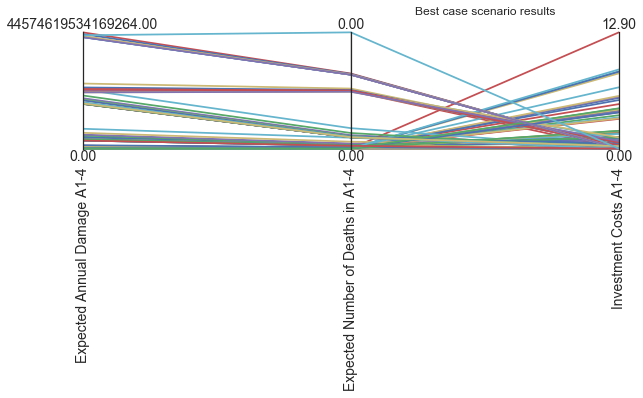

In [18]:
# The signal-to-noise metrics are also plotted to show the trade-offs between the outcomes of interest
from ema_workbench.analysis import parcoords

bestcase_data = scores
bestcase_limits = parcoords.get_limits(bestcase_data)
bestcase_limits.loc[0, ['Expected Annual Damage A1-4', 'Investment Costs A1-4', 'Expected Number of Deaths in A1-4']] = 0

paraxes = parcoords.ParallelAxes(bestcase_limits)
paraxes.plot(bestcase_data)
plt.title('Best case scenario results')

# Set figure size
# Run this twice, to get a nice broad view
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.show()

In [19]:
# With 'regret' the outcomes of interest for the various scenarios are compared
# to the scenario that provides the most preferred outcomes
experiments, outcomes = results_reevaluation_gelderland_bestcase

bestcase_regret = {}
bestcase_max_regret = {}
for outcome in model.outcomes:
    policy_column = experiments['policy']
    
    # create a DataFrame with all the relevent information
    # i.e., policy, scenario_id, and scores
    data = pd.DataFrame({outcome.name: outcomes[outcome.name], 
                         "policy":experiments['policy'],
                         "scenario_id":experiments['scenario_id']})
    
    # reorient the data by indexing with policy and scenario id
    data = data.pivot(index='scenario_id', columns='policy')
    
    # flatten the resulting hierarchical index resulting from 
    # pivoting, (might be a nicer solution possible)
    data.columns = data.columns.get_level_values(1)
   
    # we need to control the broadcasting. 
    # max returns a 1d vector across scenario id. By passing
    # np.newaxis we ensure that the shape is the same as the data
    # next we take the absolute value
    
    # basically we take the difference of the maximum across 
    # the row and the actual values in the row
    
    outcome_regret = (data.max(axis=1)[:, np.newaxis] - data).abs()
   
    bestcase_regret[outcome.name] = bestcase_regret
    bestcase_max_regret[outcome.name] = outcome_regret.max()

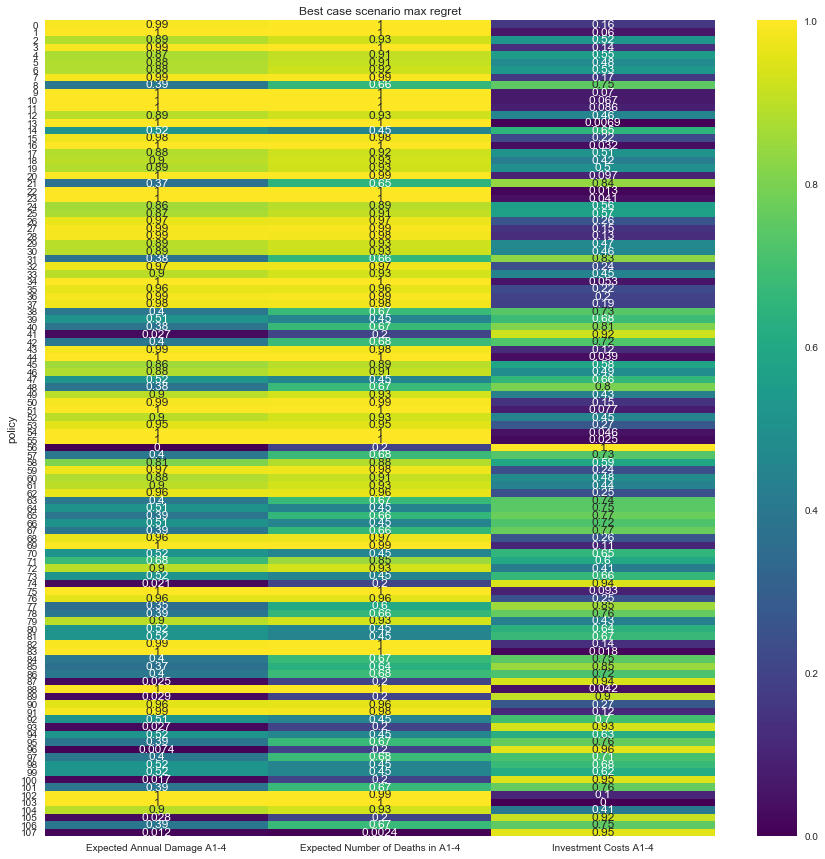

In [20]:
# The regret for each outcome of interest is shown for each solution, scored from 0-1. This is plotted, using a heatmap
bestcase_max_regret = pd.DataFrame.from_dict(bestcase_max_regret)
bestcase_max_regret = pd.DataFrame(bestcase_max_regret.iloc[:,0:3])
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(bestcase_max_regret/bestcase_max_regret.max(), cmap='viridis', annot=True)
plt.title('Best case scenario max regret')

plt.show()

# When only one solution comes forward, this part of code generates an error, since no comparison can be made

current size: [12, 15]


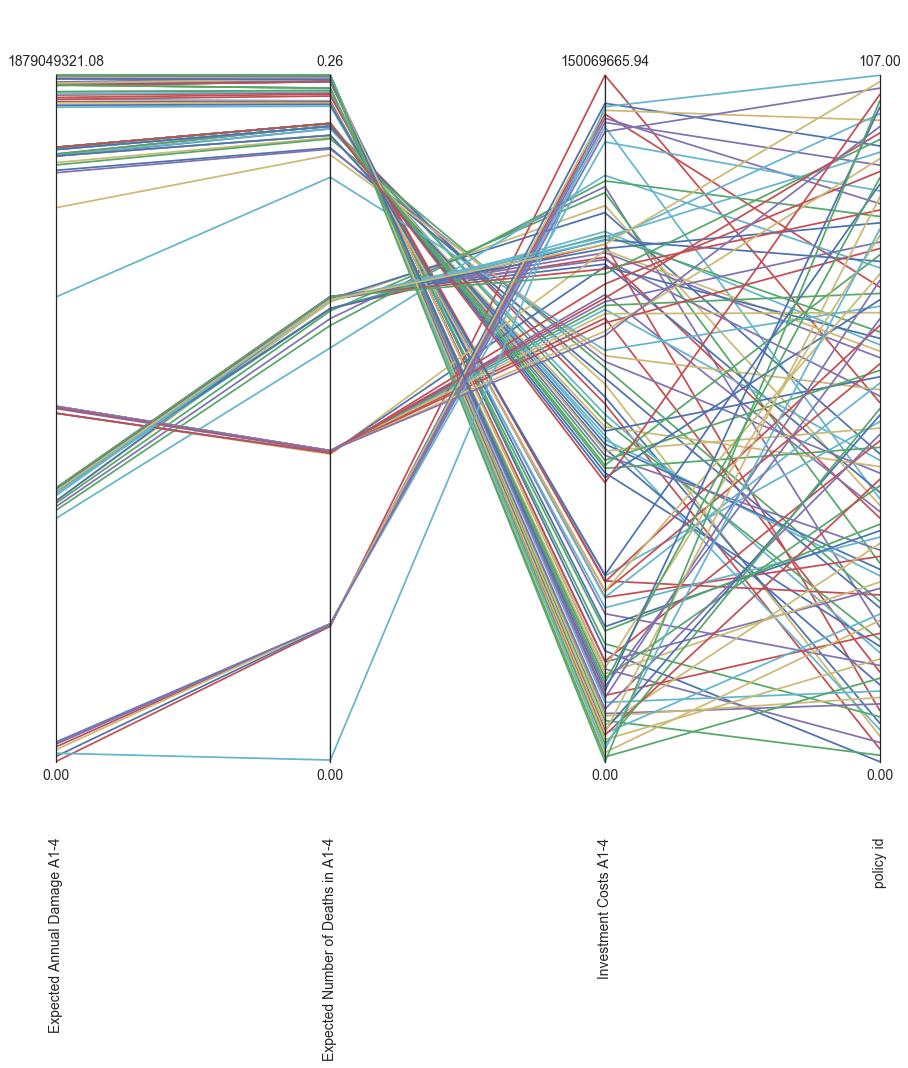

In [22]:
# In order to identify which policy belongs to which regret-trade-off line, the policy ID's are added to the parcoords plot
best_data = bestcase_max_regret

# makes it easier to identify the policy associated with each line
# in the parcoords plot
best_data['policy id'] = best_data.index.astype("float64")

best_limits = parcoords.get_limits(best_data)
best_limits.loc[0, ['Expected Annual Damage A1-4', 'Investment Costs A1-4', 'Expected Number of Deaths in A1-4']] = 0

paraxes = parcoords.ParallelAxes(best_limits)
paraxes.plot(best_data)

# Run this twice, to get a nice broad view
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

print("current size:", fig_size)


plt.show()